In [1]:
import scipy.stats
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr 
from scipy.stats import bootstrap

In [2]:
rng = np.random.default_rng()

In [3]:
x = np.array([36, 80, 50, 58, 72, 60, 56, 68, 40, 45])
y = np.array([35, 65, 60, 39, 48, 44, 48, 61, 50, 30])

print(pearsonr(x, y))

PearsonRResult(statistic=0.6014059108986999, pvalue=0.06588497917275257)


In [4]:
def corr_coefficient(x, y):
    return pearsonr(x, y)[0]

In [5]:
res_boot = bootstrap((x, y), corr_coefficient, n_resamples=9999, vectorized=False, paired=True
                     , confidence_level=0.95, method='percentile', random_state=15)

print(res_boot.confidence_interval)
print(np.mean(res_boot.bootstrap_distribution))

ConfidenceInterval(low=-0.016801086594739313, high=0.90809729833659)
0.5677851878525669


In [6]:
res_bca = bootstrap((x, y), corr_coefficient, n_resamples=9999, vectorized=False, paired=True
                     , confidence_level=0.95, method='BCa', random_state=15)

print(res_bca.confidence_interval)
print(np.mean(res_bca.bootstrap_distribution))

ConfidenceInterval(low=0.0071646178834097185, high=0.9121475026644484)
0.5677851878525669


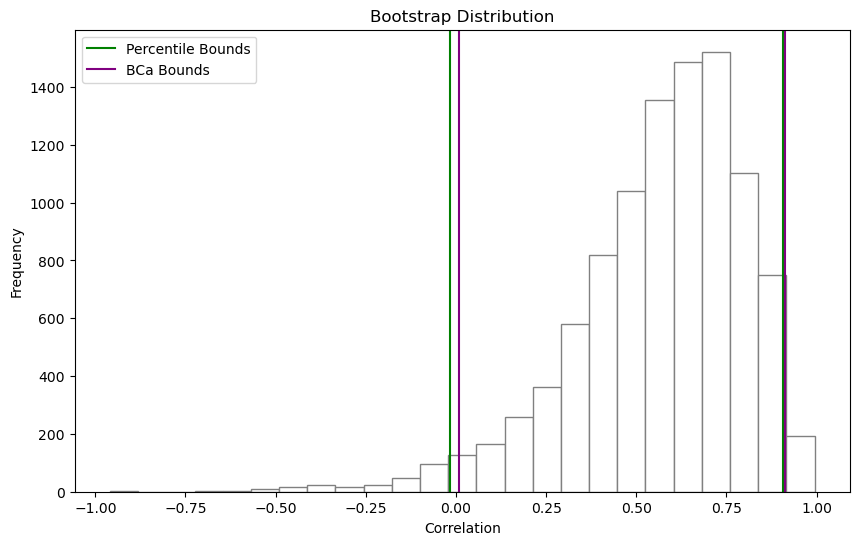

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(res_boot.bootstrap_distribution, bins=25, color='white', edgecolor='gray')
plt.axvline(x=res_boot.confidence_interval[0], color='green', label='Percentile Bounds')
plt.axvline(x=res_boot.confidence_interval[1], color='green')
plt.axvline(x=res_bca.confidence_interval[0], color='purple', label='BCa Bounds')
plt.axvline(x=res_bca.confidence_interval[1], color='purple')
plt.legend()
ax.set_title("Bootstrap Distribution")
ax.set_xlabel("Correlation")
ax.set_ylabel("Frequency")
plt.show()